# Customer Satisfaction Analysis
This notebook demonstrates the analysis of customer satisfaction based on engagement and experience metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import sys
sys.path.append('../src')
from database import get_db_connection
from engagement_analysis import get_user_engagement_metrics, perform_kmeans_clustering
from satisfaction_analysis import *

# Load environment variables
load_dotenv()

sns.set_palette('husl')

## 1. Load and Prepare Data

In [2]:
# Get database connection using the existing function
connection = get_db_connection()

# Create SQLAlchemy engine from the connection
engine = create_engine('postgresql://', creator=lambda: connection)

# Get user engagement metrics
df = get_user_engagement_metrics(connection)

# Define features for clustering
features = ['session_frequency', 'total_duration', 'total_traffic',
            'social_media_usage', 'google_usage', 'email_usage',
            'youtube_usage', 'netflix_usage', 'gaming_usage', 'other_usage']

# Perform initial clustering
df_clustered, cluster_stats, kmeans_model, X_scaled = perform_kmeans_clustering(df, features, n_clusters=3)

c:\Users\hp\Documents\telleco_week2\notebooks\../src\engagement_analysis.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


## 2. Calculate Engagement and Experience Scores

In [3]:
# Calculate engagement scores
engagement_scores = calculate_engagement_score(df, kmeans_model, X_scaled)

# Calculate experience scores
experience_scores = calculate_experience_score(df, kmeans_model, X_scaled)

# Calculate satisfaction scores
satisfaction_scores = calculate_satisfaction_score(engagement_scores, experience_scores)

# Add scores to dataframe
df['engagement_score'] = engagement_scores
df['experience_score'] = experience_scores
df['satisfaction_score'] = satisfaction_scores

## 3. Top 10 Satisfied Customers

In [4]:
top_satisfied = get_top_satisfied_customers(df, satisfaction_scores)
print("Top 10 Satisfied Customers:")
display(top_satisfied)

Top 10 Satisfied Customers:


,msisdn,satisfaction_score
106856,NaN,1.000000
13180,3.362578e+10,0.066993
6437,3.361489e+10,0.037760
92923,3.376054e+10,0.035228
13526,3.362632e+10,0.034356
65118,3.366716e+10,0.032307
50281,3.366284e+10,0.024014
666,3.360313e+10,0.023852
57160,3.366469e+10,0.023286
92577,3.376041e+10,0.021014


## 4. Satisfaction Score Prediction Model

Model Performance:
Mean Squared Error: 0.0000
R-squared Score: 0.8524


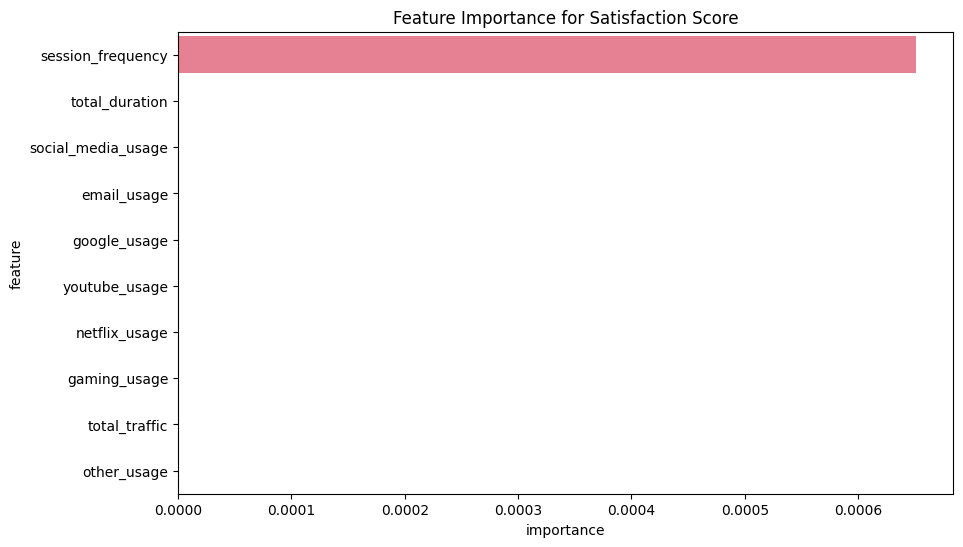

In [5]:
# Build regression model
model, mse, r2 = build_satisfaction_regression_model(df, features, 'satisfaction_score')

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': abs(model.coef_)
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Satisfaction Score')
plt.show()

## 5. Clustering Analysis

Cluster Statistics:


satisfaction_score                   experience_score          
                      mean       std   count             mean       std
cluster                                                                
0                  0.00065  0.000811  106856          0.00065  0.000811
1                  1.00000       NaN       1          1.00000       NaN

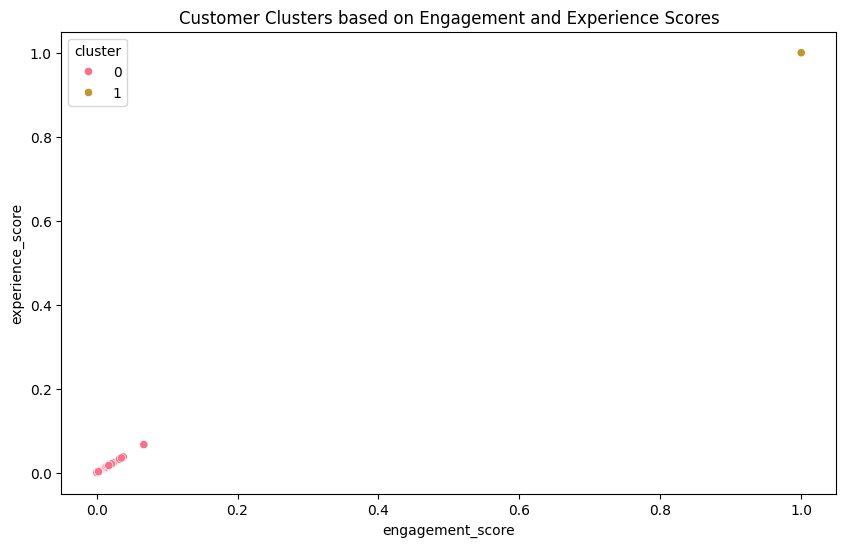

In [6]:
# Perform k-means clustering on satisfaction and experience scores
df_clustered, cluster_stats = cluster_satisfaction_experience(df, engagement_scores, experience_scores)

print("Cluster Statistics:")
display(cluster_stats)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='engagement_score', y='experience_score', hue='cluster')
plt.title('Customer Clusters based on Engagement and Experience Scores')
plt.show()

## 6. Export Results to PostgreSQL

In [7]:
# Export results to PostgreSQL
export_to_postgres(df_clustered, connection)

# Verify the export using pandas read_sql_query
query = "SELECT * FROM user_satisfaction ORDER BY satisfaction_score DESC LIMIT 5"
result = pd.read_sql_query(query, connection)
print("Sample of exported data:")
display(result)

Sample of exported data:


C:\Users\hp\AppData\Local\Temp\ipykernel_12752\1758355561.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, connection)


,msisdn,engagement_score,experience_score,satisfaction_score,cluster
0,NaN,1.000000,1.000000,1.000000,1
1,3.362578e+10,0.066993,0.066993,0.066993,0
2,3.361489e+10,0.037760,0.037760,0.037760,0
3,3.376054e+10,0.035228,0.035228,0.035228,0
4,3.362632e+10,0.034356,0.034356,0.034356,0
